## Discretinization과 Target mean

In [1]:
# 명령 결과 모두 보기
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# 버전 경고 무시
import warnings
warnings.filterwarnings('ignore')

# 판다스와 넘피
import pandas as pd
import numpy as np

# 그림 그리기
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
get_ipython().run_line_magic('matplotlib', 'inline')
plt.rcParams['font.family']='Malgun Gothic' # 한글폰트

from IPython.display import Image
width=700; height=500

https://scikit-learn.org/stable/auto_examples/model_selection/plot_cv_indices.html#sphx-glr-auto-examples-model-selection-plot-cv-indices-py

In [2]:
def summary(df) :
    tf = pd.DataFrame({'데이터형태(dtypes)' : df.dtypes,
                       '비 결측치 수(notnull': df.notnull().sum(),
                       '결측치 수(null)' : df.isnull().sum(),
                       '고유값 수(nunique)' : df.nunique()})
    return tf

# <font color='purple'> Discretization?
Discretization (otherwise known as quantization or binning) provides a way to partition continuous features into discrete values. Certain datasets with continuous features may benefit from discretization, because discretization can transform the dataset of continuous attributes to one with only nominal attributes.

One-hot encoded discretized features can make a model more expressive, while maintaining interpretability. For instance, pre-processing with a discretizer can introduce nonlinearity to linear models.
## what is K-bins discretization?
    * KBinsDiscretizer discretizes features into k bins:

In [21]:
from sklearn.preprocessing import KBinsDiscretizer

In [22]:
X = np.array([[ -3., 5., 15 ],
              [  0., 6., 14 ],
              [  6., 3., 11 ]])

est = KBinsDiscretizer(n_bins=[3, 2, 2], encode='ordinal').fit_transform(X)
est

array([[0., 1., 1.],
       [1., 1., 1.],
       [2., 0., 0.]])

In [23]:
est = KBinsDiscretizer(n_bins=[3, 2, 2], encode='onehot').fit_transform(X)
est.toarray()

array([[1., 0., 0., 0., 1., 0., 1.],
       [0., 1., 0., 0., 1., 0., 1.],
       [0., 0., 1., 1., 0., 1., 0.]])

## 예제)

In [24]:
df =sns.load_dataset('tips')
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [25]:
summary(df)

,데이터형태(dtypes),비 결측치 수(notnull,결측치 수(null),고유값 수(nunique)
total_bill,float64,244,0,229
tip,float64,244,0,123
sex,category,244,0,2
smoker,category,244,0,2
day,category,244,0,4
time,category,244,0,2
size,int64,244,0,6


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019D34388948>,
      dtype=object)

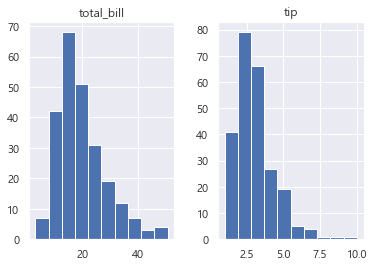

In [26]:
df[['total_bill', 'tip']].hist()

In [29]:
KBinsDiscretizer(n_bins=10, encode='ordinal').fit_transform(df['tip'].values.reshape(-1,1))

array([[0.],
       [1.],
       [6.],
       [5.],
       [6.],
       [7.],
       [2.],
       [5.],
       [1.],
       [5.],
       [1.],
       [8.],
       [1.],
       [4.],
       [5.],
       [6.],
       [1.],
       [6.],
       [6.],
       [5.],
       [7.],
       [3.],
       [2.],
       [8.],
       [5.],
       [2.],
       [2.],
       [2.],
       [7.],
       [4.],
       [0.],
       [3.],
       [4.],
       [2.],
       [5.],
       [6.],
       [2.],
       [5.],
       [2.],
       [8.],
       [2.],
       [3.],
       [5.],
       [0.],
       [8.],
       [4.],
       [8.],
       [8.],
       [2.],
       [4.],
       [3.],
       [3.],
       [8.],
       [1.],
       [7.],
       [6.],
       [4.],
       [1.],
       [1.],
       [8.],
       [5.],
       [2.],
       [1.],
       [6.],
       [3.],
       [5.],
       [2.],
       [0.],
       [2.],
       [2.],
       [1.],
       [4.],
       [5.],
       [8.],
       [2.],
       [0.],
       [5.],

In [10]:
df['total_bill_Kbins'] = KBinsDiscretizer(n_bins=10, encode='ordinal').fit_transform(df.iloc[:, :1])
df['tip_Kbins'] = KBinsDiscretizer(n_bins=10, encode='ordinal').fit_transform(df['tip'].values.reshape(-1,1))
df

,total_bill,tip,sex,smoker,day,time,size,total_bill_Kbins,tip_Kbins
0,16.99,1.01,Female,No,Sun,Dinner,2,4.0,0.0
1,10.34,1.66,Male,No,Sun,Dinner,3,1.0,1.0
2,21.01,3.50,Male,No,Sun,Dinner,3,6.0,6.0
3,23.68,3.31,Male,No,Sun,Dinner,2,7.0,5.0
4,24.59,3.61,Female,No,Sun,Dinner,4,7.0,6.0
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,8.0,8.0
240,27.18,2.00,Female,Yes,Sat,Dinner,2,8.0,2.0
241,22.67,2.00,Male,Yes,Sat,Dinner,2,7.0,2.0
242,17.82,1.75,Male,No,Sat,Dinner,2,5.0,1.0


## Mean targeting
- target mean module
- week_05_high cardinality.ipynb   참고

In [11]:
import category_encoders as ce
ce_target = ce.TargetEncoder()
ce_target.fit_transform(df['sex'], df['total_bill'])

,sex
0,18.056897
1,20.744076
2,20.744076
3,20.744076
4,18.056897
...,...
239,20.744076
240,18.056897
241,20.744076
242,20.744076


single target-mean encoding with python code

In [12]:
df.groupby('sex')['total_bill'].mean()
tm = df.groupby('sex')['total_bill'].mean()
df['sex'].map(tm)

sex
Male      20.744076
Female    18.056897
Name: total_bill, dtype: float64

0      18.056897
1      20.744076
2      20.744076
3      20.744076
4      18.056897
         ...    
239    20.744076
240    18.056897
241    20.744076
242    20.744076
243    18.056897
Name: sex, Length: 244, dtype: category
Categories (2, float64): [20.744076, 18.056897]

multiple target-mean encoding with python code

In [13]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,total_bill_Kbins,tip_Kbins
0,16.99,1.01,Female,No,Sun,Dinner,2,4.0,0.0
1,10.34,1.66,Male,No,Sun,Dinner,3,1.0,1.0
2,21.01,3.50,Male,No,Sun,Dinner,3,6.0,6.0
3,23.68,3.31,Male,No,Sun,Dinner,2,7.0,5.0
4,24.59,3.61,Female,No,Sun,Dinner,4,7.0,6.0


In [14]:
m_tm = pd.DataFrame(df.groupby(['sex', 'time'])['total_bill'].mean()).reset_index()
m_tm 

,sex,time,total_bill
0,Male,Lunch,18.048485
1,Male,Dinner,21.461452
2,Female,Lunch,16.339143
3,Female,Dinner,19.213077


In [15]:
df.merge(m_tm, on=['sex', 'time'], how='left', suffixes=('', '_sex_time_tm'))

,total_bill,tip,sex,smoker,day,time,size,total_bill_Kbins,tip_Kbins,total_bill_sex_time_tm
0,16.99,1.01,Female,No,Sun,Dinner,2,4.0,0.0,19.213077
1,10.34,1.66,Male,No,Sun,Dinner,3,1.0,1.0,21.461452
2,21.01,3.50,Male,No,Sun,Dinner,3,6.0,6.0,21.461452
3,23.68,3.31,Male,No,Sun,Dinner,2,7.0,5.0,21.461452
4,24.59,3.61,Female,No,Sun,Dinner,4,7.0,6.0,19.213077
...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,8.0,8.0,21.461452
240,27.18,2.00,Female,Yes,Sat,Dinner,2,8.0,2.0,19.213077
241,22.67,2.00,Male,Yes,Sat,Dinner,2,7.0,2.0,21.461452
242,17.82,1.75,Male,No,Sat,Dinner,2,5.0,1.0,21.461452


In [16]:
X = [[-2, 1, -4,   -1],
     [-1, 2, -3, -0.5],
     [ 0, 3, -2,  0.5],
     [ 1, 4, -1,    2]]

est = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
est.fit(X)

Xt = est.transform(X)
Xt

KBinsDiscretizer(encode='ordinal', n_bins=3, strategy='uniform')

array([[0., 0., 0., 0.],
       [1., 1., 1., 0.],
       [2., 2., 2., 1.],
       [2., 2., 2., 2.]])

# <font color = 'red'> Why Discretinization?
https://scikit-learn.org/stable/auto_examples/preprocessing/plot_discretization.html#sphx-glr-auto-examples-preprocessing-plot-discretization-py

# End